# · Overall Description

​	Based on the given data here, our main goal is to provide useful market analysis for the managers, helping them make more optimal decisions to gain more profits. Trying to figure out this problem and obtain meaningful information as much as possible, our team chose six sub-question here. When finishing these questions sequently, we are able to get a better understanding of the sales. By gathering all the conclusions drawn from each question, we can give general and instructive suggestions.

## · Introduction

​	Before we start to use specific technics or mathemetical models, we are supposed to implement data processing since we only get the rough datas here. By filtering and analysing, we can obtain datas which are more meaningful. After having a full understanding of the specific meanings of datas, we then complete our work in the following steps.

​	Import all the necessary packges

In [2]:
import sklearn
import pandas as pd
import matplotlib as plt 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


​	Download the original datas and drop the first three columns since we find them useless. And we show the first several rows of datas.

In [4]:
data = pd.read_csv('./customer_data_small01.csv')
data.dtypes
data.head()

,SHOP_WEEK,SHOP_DATE,SHOP_WEEKDAY,SHOP_HOUR,QUANTITY,SPEND,PROD_CODE,PROD_CODE_10,PROD_CODE_20,PROD_CODE_30,...,CUST_PRICE_SENSITIVITY,CUST_LIFESTAGE,BASKET_ID,BASKET_SIZE,BASKET_PRICE_SENSITIVITY,BASKET_TYPE,BASKET_DOMINANT_MISSION,STORE_CODE,STORE_FORMAT,STORE_REGION
0,200801,20080227,4,21,1,1.83,PRD0900159,CL00029,DEP00008,G00004,...,MM,OT,9.941100e+14,M,UM,Small Shop,Fresh,STORE00001,LS,E02
1,200801,20080227,4,21,1,0.86,PRD0900531,CL00026,DEP00008,G00004,...,MM,OT,9.941100e+14,M,UM,Small Shop,Fresh,STORE00001,LS,E02
2,200801,20080226,3,16,1,1.12,PRD0900925,CL00035,DEP00009,G00004,...,NaN,NaN,9.941100e+14,M,UM,Small Shop,Fresh,STORE00001,LS,E02
3,200801,20080228,5,19,3,3.42,PRD0901465,CL00005,DEP00002,G00001,...,MM,OA,9.941100e+14,M,UM,Small Shop,Fresh,STORE00001,LS,E02
4,200801,20080227,4,21,1,0.97,PRD0902700,CL00042,DEP00011,G00004,...,MM,OT,9.941100e+14,M,UM,Small Shop,Fresh,STORE00001,LS,E02


1. What day and time do the stores need more workforce  (schesuling)? Please give some advice on scheduling of workforce.



For question 1, our idea is to obtain the reference amount of a labor force by calculating the average value of orders in different regions and different periods of time. First, we calculated how many days of data were counted in the data set.

In [5]:
data.drop_duplicates(inplace=True)  # cleaning duplication values
data1 = data[['SHOP_WEEKDAY', 'SHOP_HOUR', 'STORE_REGION','CUST_LIFESTAGE']]#extract the data we need
data1 = data1.dropna()  # drop NA data
# count the accumulative product sale in different regions
print(data1['STORE_REGION'].value_counts())

W02    6319
N01    6016
S02    5595
N03    5540
S01    4900
S03    4683
N02    4629
W01    4589
E01    4398
E02    3817
W03    3719
E03    3708
Name: STORE_REGION, dtype: int64


In [6]:
data1['STORE_REGION'] = data1.STORE_REGION.factorize()[0]#numberlize string lable 
data1['STORE_REGION'].value_counts()


5     6319
6     6016
9     5595
10    5540
4     4900
11    4683
8     4629
1     4589
2     4398
0     3817
7     3719
3     3708
Name: STORE_REGION, dtype: int64

In [7]:
a = []
print(data1['STORE_REGION'])
for i in data1['STORE_REGION']:
      if (i == 2 or i == 0 or i == 3):
          a.append(1)
      elif (i == 1 or i == 5 or i == 7):
          a.append(2)
      elif (i == 4 or i == 9 or i == 11):
          a.append(3)
      else:
          a.append(4)#

data1['STORE_REGION'] = a

print(data1['STORE_REGION'].value_counts())

0        0
1        0
3        0
4        0
5        0
        ..
80656    0
80657    0
80658    0
80659    0
80660    0
Name: STORE_REGION, Length: 57913, dtype: int64
4    16185
3    15178
2    14627
1    11923
Name: STORE_REGION, dtype: int64


In [8]:
print(data1)

       SHOP_WEEKDAY  SHOP_HOUR  STORE_REGION CUST_LIFESTAGE
0                 4         21             1             OT
1                 4         21             1             OT
3                 5         19             1             OA
4                 4         21             1             OT
5                 2         17             1             OA
...             ...        ...           ...            ...
80656             4         14             1             OT
80657             4         14             1             OT
80658             1         20             1             YF
80659             4         14             1             OT
80660             1         20             1             YF

[57913 rows x 4 columns]


In [9]:
datas2 = data1[['SHOP_WEEKDAY', 'STORE_REGION']].value_counts()
datas1 = data1[['SHOP_HOUR', 'STORE_REGION']].value_counts()

countvalue=pd.DataFrame(datas1)
countvalue

outputpath001 = 'd:/001.csv'
countvalue.to_csv(outputpath001, sep=',', index=True, header=True)
countvalue = pd.DataFrame(datas2)
countvalue
outputpath002 = 'd:/002.csv'
countvalue.to_csv(outputpath002, sep=',', index=True, header=True)

In [10]:
df1 = pd.read_csv('d:/001.csv')
df2 = pd.read_csv('d:/002.csv')

Z1 = np.zeros(shape=(12, 24))

for i in range(len(df1['SHOP_HOUR'])):
    Z1[df1.iloc[i, 1]][df1.iloc[i, 0]] = df1.iloc[i, 2]


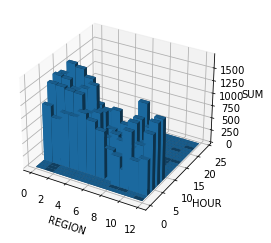

In [12]:
#count the data
from mpl_toolkits.mplot3d import Axes3D

X = np.arange(0, 12, step=1)
Y = np.arange(0, 24, step=1) 

xx, yy = np.meshgrid(X, Y) 
X, Y = xx.ravel(), yy.ravel()  

bottom = np.zeros_like(X) 
Z1 = Z1.ravel()  

width = 1
height = 1  


fig = plt.figure()
ax = fig.gca(projection='3d')
ax.bar3d(X, Y, bottom, width, height, Z1, shade=True)

ax.set_xlabel('REGION')
ax.set_ylabel('HOUR')
ax.set_zlabel('SUM')
plt.show()



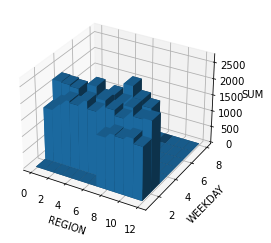

In [13]:
from mpl_toolkits.mplot3d import Axes3D
Z2 = np.zeros(shape=(12, 7))

for i in range(len(df2['SHOP_WEEKDAY'])):
    Z2[df2.iloc[i, 1]][df2.iloc[i, 0]-1] = df2.iloc[i, 2]


X = np.arange(0, 12, step=1) 
Y = np.arange(1, 8, step=1) 

xx, yy = np.meshgrid(X, Y)  
X, Y = xx.ravel(), yy.ravel()  

bottom = np.zeros_like(X)  
Z2 = Z2.ravel()  

width = 1
height = 1  


fig = plt.figure()
ax = fig.gca(projection='3d')  
ax.bar3d(X, Y, bottom, width, height, Z2, shade=True)

ax.set_xlabel('REGION')
ax.set_ylabel('WEEKDAY')
ax.set_zlabel('SUM')
plt.show()


In [14]:
from datetime import datetime
from pandas.core.frame import DataFrame


def formateDate(stringdate):
  
    dt = datetime.strptime(stringdate, '%Y%m%d')
    return dt

 = []
for item in data.SHOP_DATE.tolist():
    try:
        b.append(str(item))
    except:
        b.append('NaN')

b_datetime = [datetime.strptime(x, '%Y%m%d') for x in b]


data.time = DataFrame(b_datetime)
data.time.dtypes

datatime = DataFrame(b)
datatime.drop_duplicates(subset=0, inplace=True)
datatime.sort_values(by=0, axis=0, ascending=True, inplace=True)
print(datatime)
print(len(datatime))


              0
5      20080225
2      20080226
0      20080227
3      20080228
102    20080229
31     20080301
15     20080302
26511  20080303
26534  20080304
26555  20080305
26510  20080306
26514  20080307
26539  20080308
26712  20080309
53771  20080310
53811  20080311
53772  20080312
53774  20080313
53826  20080314
53773  20080315
53868  20080316
21



Then we divide those shops by regions. That is to figure out the the information in different regions because region is what really matters.

These graphs show the average number of goods sold for each day of the week in these four regions which is east, west, south and north.

Through these 8 graphs, you can get the day of the week and when of the day different regions need more labor.

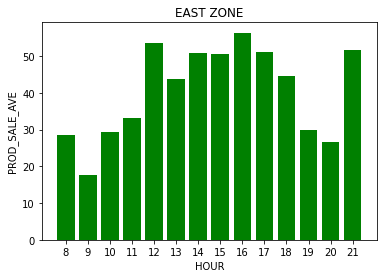

In [ ]:
dff1 = df1.copy(deep=True)
dff1.sort_values(by='SHOP_HOUR', axis=0, ascending=True, inplace=True)

dff2 = df2.copy(deep=True)
dff2.sort_values(by='SHOP_WEEKDAY', axis=0, ascending=True, inplace=True)



df11 = df1[df1['STORE_REGION'] == 1]
df12 = df1[df1['STORE_REGION'] == 2]
df13 = df1[df1['STORE_REGION'] == 3]
df14 = df1[df1['STORE_REGION'] == 4]

dff11 = dff1[dff1['STORE_REGION'] == 1]
dff12 = dff1[dff1['STORE_REGION'] == 2]
dff13 = dff1[dff1['STORE_REGION'] == 3]
dff14 = dff1[dff1['STORE_REGION'] == 4]


df21 = df2[df2['STORE_REGION'] == 1]
df22 = df2[df2['STORE_REGION'] == 2]
df23 = df2[df2['STORE_REGION'] == 3]
df24 = df2[df2['STORE_REGION'] == 4]

dff21 = dff2[dff2['STORE_REGION'] == 1]
dff22 = dff2[dff2['STORE_REGION'] == 2]
dff23 = dff2[dff2['STORE_REGION'] == 3]
dff24 = dff2[dff2['STORE_REGION'] == 4]

#plt.hist(df11['0'],density=True,rwidth=0.96)


plt.ylabel('PROD_SALE_AVE')
plt.title('EAST ZONE')
plt.bar(x=range(len(dff11['0'])),  
        height=dff11['0']/21, 
        tick_label=dff11['SHOP_HOUR'], 
        color='green',  
        )
plt.xlabel('HOUR')

plt.show()


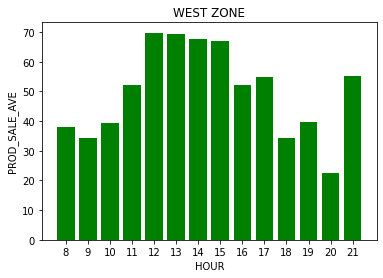

In [ ]:

plt.ylabel('PROD_SALE_AVE')
plt.title('WEST ZONE')
plt.bar(x=range(len(dff12['0'])),          height=dff12['0']/21,  
        tick_label=dff12['SHOP_HOUR'],  
        color='green',  
        )
plt.xlabel('HOUR')

plt.show()


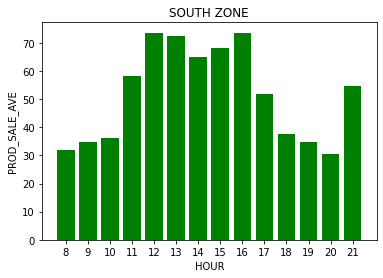

In [ ]:

plt.ylabel('PROD_SALE_AVE')
plt.title('SOUTH ZONE')
plt.bar(x=range(len(dff13['0'])),  
        height=dff13['0']/21,  
        tick_label=dff13['SHOP_HOUR'], 
        color='green', 
        )
plt.xlabel('HOUR')

plt.show()


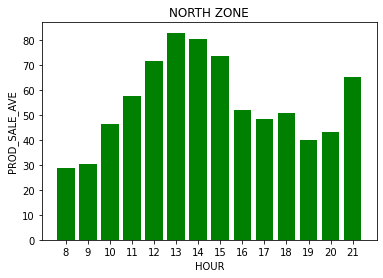

In [ ]:

plt.ylabel('PROD_SALE_AVE')
plt.title('NORTH ZONE')
plt.bar(x=range(len(dff14['0'])), 
        height=dff14['0']/21,  
        tick_label=dff14['SHOP_HOUR'],  
        color='green', 
        )
plt.xlabel('HOUR')

plt.show()


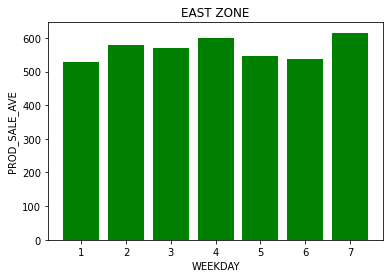

In [ ]:

plt.title('EAST ZONE')
plt.ylabel('PROD_SALE_AVE')
plt.xlabel('WEEKDAY')

plt.bar(x=range(len(dff21['0'])), 
        height=dff21['0']/3,  
        tick_label=dff21['SHOP_WEEKDAY'],
        color='green', 
        )
plt.show()


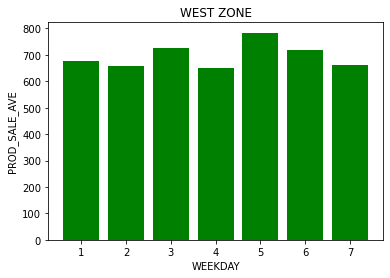

In [ ]:

plt.title('WEST ZONE')
plt.ylabel('PROD_SALE_AVE')
plt.xlabel('WEEKDAY')
plt.bar(x=range(len(dff22['0'])),  
        height=dff22['0']/3, 
        tick_label=dff22['SHOP_WEEKDAY'], 
        color='green', 
        )

plt.show()


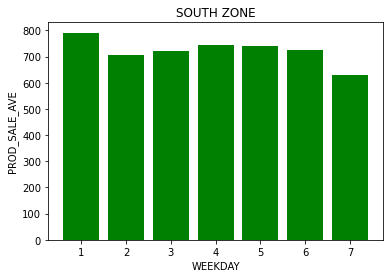

In [ ]:

plt.title('SOUTH ZONE')
plt.ylabel('PROD_SALE_AVE')
plt.xlabel('WEEKDAY')
plt.bar(x=range(len(dff23['0'])),  
        height=dff23['0']/3, 
        tick_label=dff23['SHOP_WEEKDAY'], 
        color='green',  
        )

plt.show()


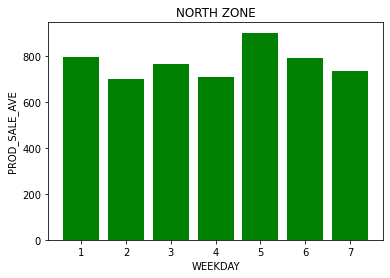

In [ ]:

plt.title('NORTH ZONE')
plt.ylabel('PROD_SALE_AVE')
plt.xlabel('WEEKDAY')
plt.bar(x=range(len(dff24['0'])), 
        height=dff24['0']/3, 
        tick_label=dff24['SHOP_WEEKDAY'],  
        color='green',  
        )

plt.show()


2. Based on Q1, is there any connection between the less profitable time period and the lifestage of customer who spend more money at this period?

We noticed that there is data only from 8 am to 21 pm, thus we hereby define two hours as a time period group and divide them into 7 blocks. And then our idea is to calculate the average sales volume of these seven time periods on the basis of question 1. 

The graghs below are showing the average sales volume of 7 time periods in the northern region, and then we get the average sales volume of the four regions respectively. Secondly, we filter the time periods lower than this average sales volume, as the time period with lower profit.What's more, we filter the datas, calculating the correlation between the time period and the user's life stage. The results are shown in the following.

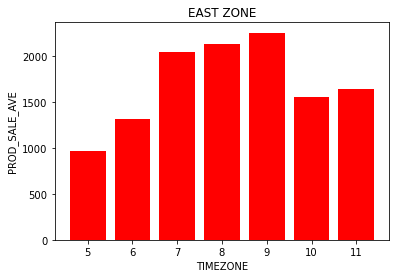

In [ ]:
datas1 = data1[['SHOP_HOUR', 'STORE_REGION']].value_counts()

dz1 = dff11.copy(deep=True)
dz2 = dff12.copy(deep=True)
dz3 = dff13.copy(deep=True)
dz4 = dff14.copy(deep=True)

def time_llist(x):
    time_list=[]
    for i in x:
      if (i == 8 or i == 9):
          time_list.append(5)
      elif (i == 10 or i == 11):
          time_list.append(6)
      elif (i == 12 or i == 13):
          time_list.append(7)
      elif (i == 14 or i == 15):
          time_list.append(8)
      elif (i == 16 or i == 17):
          time_list.append(9)
      elif (i == 18 or i == 19):
          time_list.append(10)
      else:
          time_list.append(11)
    return time_list


dz1['SHOP_HOURnew'] = time_llist(dz1['SHOP_HOUR'])
d1 = dz1[['SHOP_HOURnew', '0']].value_counts()
d11 = pd.DataFrame(d1)
path1 = 'd:/11.csv'
d11.to_csv(path1, sep=',', index=True, header=True)
d2211= pd.read_csv(path1)

dz2['SHOP_HOURnew'] = time_llist(dz2['SHOP_HOUR'])
d2 = dz2[['SHOP_HOURnew', '0']].value_counts()
d12 = pd.DataFrame(d2)
path2 = 'd:/12.csv'
d12.to_csv(path2, sep=',', index=True, header=True)
d2212 = pd.read_csv(path2)

dz3['SHOP_HOURnew'] = time_llist(dz3['SHOP_HOUR'])
d3 = dz3[['SHOP_HOURnew', '0']].value_counts()
d13 = pd.DataFrame(d3)
path3 = 'd:/13.csv'
d13.to_csv(path3, sep=',', index=True, header=True)
d2213 = pd.read_csv(path3)

dz4['SHOP_HOURnew'] = time_llist(dz4['SHOP_HOUR'])
d4 = dz4[['SHOP_HOURnew', '0']].value_counts()
d14 = pd.DataFrame(d4)
path4 = 'd:/14.csv'
d14.to_csv(path4, sep=',', index=True, header=True)
d2214 = pd.read_csv(path4)


def summ(x):
    sum = []
    i = 0
    while i <14:
        su = x.iloc[i,1]+x.iloc[i+1,1]
        sum.append(su)
        i += 2
    
    return sum


timeindex=[5,6,7,8,9,10,11]

datasum = pd.DataFrame({'timeindex': timeindex, 'sum1': summ(d2211), 'sum2': summ(
    d2212), 'sum3': summ(d2213), 'sum4': summ(d2214)}, columns=['timeindex', 'sum1', 'sum2', 'sum3', 'sum4'])


#drawing
plt.title('EAST ZONE')
plt.ylabel('PROD_SALE_AVE')
plt.xlabel('TIMEZONE')
plt.bar(x=range(len(datasum['sum1'])), 
        height=datasum['sum1'], 
        tick_label=datasum['timeindex'], 
        color='red', 
        )
plt.show()



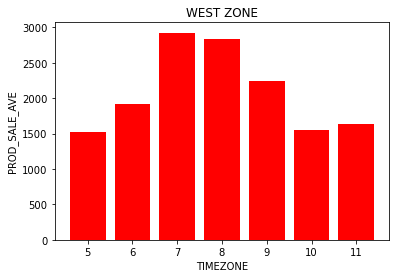

In [ ]:
plt.title('WEST ZONE')
plt.ylabel('PROD_SALE_AVE')
plt.xlabel('TIMEZONE')
plt.bar(x=range(len(datasum['sum2'])),  
        height=datasum['sum2'],  
        tick_label=datasum['timeindex'],  
        color='red',  
        )
plt.show()


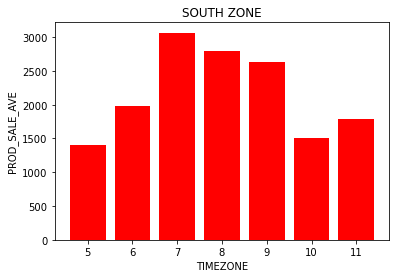

In [ ]:
plt.title('SOUTH ZONE')
plt.ylabel('PROD_SALE_AVE')
plt.xlabel('TIMEZONE')
plt.bar(x=range(len(datasum['sum3'])), 
        height=datasum['sum3'],  
        tick_label=datasum['timeindex'],  
        color='red', 
plt.show()


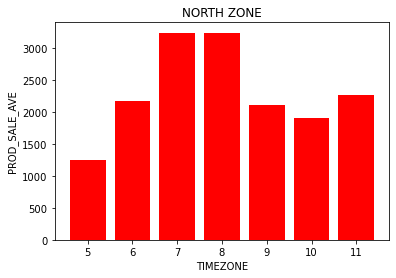

In [ ]:
plt.title('NORTH ZONE')
plt.ylabel('PROD_SALE_AVE')
plt.xlabel('TIMEZONE')
plt.bar(x=range(len(datasum['sum4'])),  
        height=datasum['sum4'],  
        tick_label=datasum['timeindex'],  
        color='red',  
        )
plt.show()


In [ ]:
dm=datasum.mean()
dm

timeindex       8.000000
sum1         1703.285714
sum2         2089.571429
sum3         2168.285714
sum4         2312.142857
dtype: float64

In [ ]:
td1=datasum[['timeindex','sum1']][datasum['sum1']< dm[1]]
td2=datasum[['timeindex','sum2']][datasum['sum2']< dm[2]]
td3 = datasum[['timeindex', 'sum3']][datasum['sum3'] < dm[3]]
td4 = datasum[['timeindex', 'sum4']][datasum['sum4'] < dm[4]]



print(td1)
print(td2)
print(td3)
print(td4)
#judge result:5,6,10 are less profit TIMEZONE


   timeindex  sum1
0          5   966
1          6  1313
5         10  1560
6         11  1648
   timeindex  sum2
0          5  1520
1          6  1922
5         10  1551
6         11  1635
   timeindex  sum3
0          5  1397
1          6  1983
5         10  1514
6         11  1789
   timeindex  sum4
0          5  1246
1          6  2179
4          9  2111
5         10  1904
6         11  2268


In [17]:
data01 = data1[((data1['SHOP_HOUR'] <= 11) & (data1['SHOP_HOUR'] >= 8))|((data1['SHOP_HOUR'] <= 19) & (data1['SHOP_HOUR'] >= 18))][['SHOP_HOUR', 'STORE_REGION', 'CUST_LIFESTAGE']]
data01['CUST_LIFESTAGE'] = data01.CUST_LIFESTAGE.factorize()[0]
dc1 = data01[data01['STORE_REGION'] == 1]
dc2 = data01[data01['STORE_REGION'] == 2]
dc3 = data01[data01['STORE_REGION'] == 3]
dc4 = data01[data01['STORE_REGION'] == 4]
dc1.corr()
dc2.corr()
dc3.corr()
dc4.corr()

,SHOP_HOUR,STORE_REGION,CUST_LIFESTAGE
SHOP_HOUR,1.00000,NaN,0.03168
STORE_REGION,NaN,NaN,NaN
CUST_LIFESTAGE,0.03168,NaN,1.00000


After the presentation, we searched for relevant information for learning, and found a way to solve the relevance of discrete data. We used the definition of entropy to calculate the relevance of discrete data.

### Entropy (Information Entropy)

Entropy is defined as: the mathematical expectation of information.
$$
H(X)=\sum_{}^{}p_i\log(p_i)
$$


The greater the entropy, the more disordered and chaotic. The probability determines that the event entropy is the smallest = 0. The more values that a random event X can take, the larger the corresponding entropy value, the more chaotic.

The samples belong to one category, and the entropy is 0. The more categories of the samples, the more uniform they are, and the greater the information entropy.

### Conditional Entropy

The conditional entropy of Y under X conditions indicates the degree of uncertainty of Y under X conditions. The conditional entropy will decrease relative to the original entropy.
$$
H(Y|X)=\sum_{}^{}p(x_i)H(Y|X=x_i)
$$

### Correlation

We can calculate the above data to calculate the correlation, you can refer to the following code：

s1 & s2 is the two columns we want to find the correlation

def getDiscreteCorr(s1,s2):
    return getEntropyGain(s1,s2)/math.sqrt(getEntropy(s1)*getEntropy(s2))
print('DiscreteCorr',getDiscreteCorr(s1,s2))

But because of the actual data set we can’t determine the probability distribution, we initially guessed it as the Poisson distribution, and we don’t know how the conditional probability is expressed in python, so we could not get the code.


3. Is there any correlation between the customer frequency and the region where the shop located?
what kinds of people    different region

First of all, when dealing with this question, we first choose the specific valuable data columns for our further solution. Then we spilit those useful datas into training part and testing part for better application. 

After that, we import standard scaler for further data processing. Due to this step, we are able to get the results we want. Detailed steps
are shown below.

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans


In [ ]:
#load data
transaction = pd.read_csv('/content/customer_data_small.csv', engine='python')
#view the info
transaction.head()


In [ ]:
#borrar las NAN
transaction = transaction.dropna()
transaction.head()


In [ ]:
transaction.dtypes


In [ ]:
#Se elijen las variables a utilizar We choose the variables
#Se pasan los datos de obj a int Convert
transaction.head()

column_subset = ['QUANTITY', 'SPEND', 'PROD_CODE', 'CUST_CODE']

df = transaction[column_subset]
df.head()


In [ ]:
df.dtypes


In [ ]:
df.PROD_CODE = df.PROD_CODE.str.replace('PRD', '').astype(int)
df.CUST_CODE = df.CUST_CODE.str.replace('CUST', '').astype(int)
df.head()


In [ ]:
#las variables x son las dependientes y la variable y es la independiente
x = df[['QUANTITY', 'SPEND']]
y = df['PROD_CODE']


In [ ]:
#para todas las filas que tienen el mismo CUST_CODE, se deben sumar para SPEND con sklearn.decomposition
#for all rows that have the same CUST_CODE, they must be summed for SPEND with sklearn.decomposition
from sklearn.decomposition import PCA
pca = PCA(n_components=2)


In [ ]:
from sklearn.preprocessing import scale
x_std = scale(x.values)


In [ ]:
pca.fit_transform(x_std)


In [ ]:
explained_variance = pd.DataFrame(pca.explained_variance_)
ax = explained_variance.head().plot.bar(legend=False, figsize=(4, 4))
ax.set_xlabel('Quantity Spend')


4. Is there any correlation between the kind of product and the customers’ price sensitivity?

As for this question, we try to figure out the correlations between those variables. Then we use some evaluation methods such as recall, precision, f1-score and support to check the results.

In [ ]:
# Import packages
import matplotlib.pyplot as plt
import numpy as np
import collections
import glob
import pprint
import pandas as pd
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs
# https://www.scikit-yb.org/en/latest/api/cluster/elbow.html
from yellowbrick.cluster import KElbowVisualizer
# Customizing matplotlib
plt.rcParams['figure.figsize'] = (20, 10)
plt.style.use('ggplot')
transaction = pd.read_csv('/content/customer_data_small.csv')
transaction.head()


In [ ]:
transaction.describe(include='all')


In [ ]:
transaction = transaction.dropna()


In [ ]:
transaction.dtypes

In [ ]:
transaction["CUST_PRICE_SENSITIVITY"] = transaction["CUST_PRICE_SENSITIVITY"].astype(
    'category')
transaction["CUST_LIFESTAGE"] = transaction["CUST_LIFESTAGE"].astype(
    'category')
transaction["BASKET_SIZE"] = transaction["BASKET_SIZE"].astype('category')
transaction["STORE_REGION"] = transaction["STORE_REGION"].astype('category')
transaction["BASKET_PRICE_SENSITIVITY"] = transaction["BASKET_PRICE_SENSITIVITY"].astype(
    'category')
transaction.dtypes


In [ ]:
transaction["CUST_PRICE_SENSITIVITY_cat"] = transaction["CUST_PRICE_SENSITIVITY"].cat.codes
transaction["CUST_LIFESTAGE_cat"] = transaction["CUST_LIFESTAGE"].cat.codes
transaction["BASKET_SIZE_cat"] = transaction["BASKET_SIZE"].cat.codes
transaction["STORE_REGION_cat"] = transaction["STORE_REGION"].cat.codes
transaction["BASKET_PRICE_SENSITIVITY_cat"] = transaction["BASKET_PRICE_SENSITIVITY"].cat.codes
transaction.head()


In [ ]:
transaction.dtypes


In [ ]:
transaction.shape
transaction.nunique()


In [ ]:
column_subset = ['QUANTITY', 'SPEND', 'CUST_LIFESTAGE_cat', 'CUST_PRICE_SENSITIVITY_cat',
                 'BASKET_SIZE_cat', 'STORE_REGION_cat', 'BASKET_PRICE_SENSITIVITY_cat']

df = transaction[column_subset]
df.head()


In [ ]:
from sklearn.model_selection import train_test_split
X = df.drop(['CUST_PRICE_SENSITIVITY_cat'], axis=1)
y = df['CUST_PRICE_SENSITIVITY_cat']
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=0)


In [ ]:
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(n_estimators=200, random_state=0)
classifier.fit(X_train, y_train)
predictions = classifier.predict(X_test)


In [ ]:
from sklearn.metrics import classification_report, accuracy_score
print(classification_report(y_test, predictions))
print(accuracy_score(y_test, predictions))


In [ ]:
feat_importances = pd.Series(classifier.feature_importances_, index=X.columns)
feat_importances.nlargest(10).plot(kind='barh')


5. Identify the most popular product with types of customers of the store. Further, predict that if a customer buys a product 'A', then in future they will buy a product 'B’ . ( A & B mean any category of the product )

When considering question 5,we read about some references, we then find the priori algorithm is the most suitable way to solve the second subquestion. By setting the minimum support and minimum confidence due to the large amount of data, although there are a lot of products, we can still set a relatively large minimum confidence level to filter most useless products and obtain products with relatively large correlations.

The results are shown in the following.

5.1 preprocess

In [ ]:
import sklearn
import pandas as pd
import matplotlib as plt
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

data = pd.read_csv(
    'customer_data_large.csv')
data.drop('Unnamed: 0', axis=1, inplace=True)
data.drop('0', axis=1, inplace=True)
data.drop('1', axis=1, inplace=True)
data.columns = ['SHOP_DATE', 'SHOP_WEEKDAY', 'SHOP_HOUR', 'QUANTITY',
                'SPEND', 'PRODUCT_CODE', 'PRODUCT_CODE10', 'PRODUCT_CODE20', 'PRODUCT_CODE30', 'PRODUCT_CODE40', 'CUSTOMER_CODE', 'CUST_PRICE_SENSITIVITY', 'CUST_LIFESTAGE', 'BASKET_ID', 'BASKET_SIZE', 'BASKET_PRICE_SENSITIVITY', 'BASKET_TYPE', 'BASKET_DOMINANT_MISSION', 'STORE_CODE', 'STORE_FORMAT', 'STORE_REGION']
data = data.dropna()
df = pd.DataFrame(data, columns=data.columns)

df1 = df[['BASKET_ID', 'PRODUCT_CODE']]
df1.reset_index(inplace=True)
gb = df1.groupby('BASKET_ID')
result = gb['PRODUCT_CODE'].unique()
df2 = result.to_frame()
df2.to_excel('C:/Users/UniqueTropic/Experiment/DataSet/1.xls')


5.2 main

In [ ]:
#-*- coding: utf-8 -*-

from __future__ import print_function
import pandas as pd
from apriori import * 

inputfile = 'C:/Users/UniqueTropic/Experiment/DataSet//1.xls'
outputfile = 'C:/Users/UniqueTropic/Experiment/DataSet//apriori_rules.xls'
data = pd.read_excel(inputfile, header=None)

print(u'\ncovert to martix0-1...')


def ct(x): return pd.Series(1, index=x[pd.notnull(x)])  


b = map(ct, data.values)  
data = pd.DataFrame(list(b)).fillna(0) 
print(u'\n done')
del b 

support = 0.2  
confidence = 0.5  
ms = '---'  # default'--'，

find_rule(data, support, confidence, ms).to_excel(outputfile)


5.3 apriori

In [ ]:
#-*- coding: utf-8 -*-
from __future__ import print_function
import pandas as pd


def connect_string(x, ms):
  x = list(map(lambda i:sorted(i.split(ms)), x))
  l = len(x[0])
  r = []
  for i in range(len(x)):
    for j in range(i,len(x)):
      if x[i][:l-1] == x[j][:l-1] and x[i][l-1] != x[j][l-1]:
        r.append(x[i][:l-1]+sorted([x[j][l-1],x[i][l-1]]))
  return r

def find_rule(d, support, confidence, ms = u'--'):
  result = pd.DataFrame(index=['support', 'confidence']) 

  support_series = 1.0*d.sum()/len(d) 
  column = list(support_series[support_series > support].index) 
  k = 0

  while len(column) > 1:
    k = k+1
    print(u'\n in the  %s search...' %k)
    column = connect_string(column, ms)
    print(u'number：%s...' %len(column))
    sf = lambda i: d[i].prod(axis=1, numeric_only = True) 

   
    d_2 = pd.DataFrame(list(map(sf,column)), index = [ms.join(i) for i in column]).T

    support_series_2 = 1.0*d_2[[ms.join(i) for i in column]].sum()/len(d) 
    column = list(support_series_2[support_series_2 > support].index)
    support_series = support_series.append(support_series_2)
    column2 = []

    for i in column: 
      i = i.split(ms)
      for j in range(len(i)):
        column2.append(i[:j]+i[j+1:]+i[j:j+1])

    cofidence_series = pd.Series(index=[ms.join(i) for i in column2])

    for i in column2: 
      cofidence_series[ms.join(i)] = support_series[ms.join(sorted(i))]/support_series[ms.join(i[:len(i)-1])]

    for i in cofidence_series[cofidence_series > confidence].index:
      result[i] = 0.0
      result[i]['confidence'] = cofidence_series[i]
      result[i]['support'] = support_series[ms.join(sorted(i.split(ms)))]

  result = result.T.sort_values(['confidence','support'], ascending = False)
  print(u'\n result：')
  print(result)

  return result

6. Can you make a sales prediction,and find a solution based on mathmatical model.

Since our team needs to make a prediction, our first intuitive thought is to apply supervised learning method. 

Then first of all, we make a further processing on our datas. Then we use linear regression to fit our datas, training a proper model here. After doing this, we try to make our predictions

In [ ]:
# Import packages
import matplotlib.pyplot as plt
import numpy as np
import collections
import glob
import pprint
import pandas as pd
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs
# https://www.scikit-yb.org/en/latest/api/cluster/elbow.html
from yellowbrick.cluster import KElbowVisualizer
# Customizing matplotlib
plt.rcParams['figure.figsize'] = (20, 10)
plt.style.use('ggplot')


In [ ]:

transaction = pd.read_csv('/content/customer_data_small.csv')
transaction.head()

In [ ]:
transaction = transaction.dropna()
transaction.head()


In [ ]:
transaction.PROD_CODE = transaction.PROD_CODE.str.replace(
    'PRD', '').astype(int)
transaction.head()

In [ ]:
transaction["CUST_PRICE_SENSITIVITY"] = transaction["CUST_PRICE_SENSITIVITY"].astype(
    'category')
transaction["CUST_LIFESTAGE"] = transaction["CUST_LIFESTAGE"].astype(
    'category')
transaction["BASKET_SIZE"] = transaction["BASKET_SIZE"].astype('category')
transaction["STORE_REGION"] = transaction["STORE_REGION"].astype('category')
transaction["BASKET_PRICE_SENSITIVITY"] = transaction["BASKET_PRICE_SENSITIVITY"].astype(
    'category')
transaction.dtypes


In [ ]:
transaction["CUST_PRICE_SENSITIVITY_cat"] = transaction["CUST_PRICE_SENSITIVITY"].cat.codes
transaction["CUST_LIFESTAGE_cat"] = transaction["CUST_LIFESTAGE"].cat.codes
transaction["BASKET_SIZE_cat"] = transaction["BASKET_SIZE"].cat.codes
transaction["STORE_REGION_cat"] = transaction["STORE_REGION"].cat.codes
transaction["BASKET_PRICE_SENSITIVITY_cat"] = transaction["BASKET_PRICE_SENSITIVITY"].cat.codes
transaction.head()


In [ ]:
transaction.shape
transaction.nunique()


In [ ]:
column_subset = ['SPEND', 'QUANTITY', 'PROD_CODE', 'CUST_CODE',
                 'CUST_PRICE_SENSITIVITY_cat', 'CUST_LIFESTAGE_cat', 'STORE_REGION_cat']

df = transaction[column_subset]
df.head()


In [ ]:
from sklearn import linear_model
from sklearn import datasets  # imports datasets from scikit-learn


In [ ]:
X = df.drop(['SPEND'], axis=1)
y = df['SPEND']
df.describe()


In [ ]:
from sklearn.linear_model import LinearRegression


In [ ]:
predictors = ['QUANTITY', 'PROD_CODE', 'CUST_CODE',
              'CUST_PRICE_SENSITIVITY_cat', 'CUST_LIFESTAGE_cat', 'STORE_REGION_cat']
outcome = 'SPEND'

lm = LinearRegression()
lm.fit(df[predictors], df[outcome])

print(f'Intercept: {lm.intercept_:.3f}')
print('Coefficients:')
for name, coef in zip(predictors, lm.coef_):
    print(f' {name}: {coef}')


In [ ]:
from sklearn.metrics import r2_score, mean_squared_error
import numpy as np

fitted = lm.predict(df[predictors])
RMSE = np.sqrt(mean_squared_error(df[outcome], fitted))
r2 = r2_score(df[outcome], fitted)
print(f'RMSE: {RMSE:.0f}')
print(f'r2: {r2:.4f}')


In [ ]:
additional_columns = ['QUANTITY', 'CUST_PRICE_SENSITIVITY_cat',
                      'CUST_LIFESTAGE_cat', 'STORE_REGION_cat']

for col in additional_columns:
  col_name = col+'_squared'
  df[col_name] = df[col]**2
  predictors.append(col_name)
df.describe()


In [ ]:
lm.fit(df[predictors], df[outcome])

print(f'Intercept: {lm.intercept_:.3f}')
print('Coefficients:')
for name, coef in zip(predictors, lm.coef_):
    print(f' {name}: {coef}')


In [ ]:
from sklearn.metrics import r2_score, mean_squared_error
import numpy as np

fitted = lm.predict(df[predictors])
RMSE = np.sqrt(mean_squared_error(df[outcome], fitted))
r2 = r2_score(df[outcome], fitted)
print(f'RMSE: {RMSE:.0f}')
print(f'r2: {r2:.4f}')


## Conclusion

By solving all the questions, we believe we obtain enough information. 

According to the conclusions from question 1 and 2 , the manager can assign their workforce better. Based on question 3 , the managers can knows better about the relation between the customer frequency and region. As for question 4 and 5, the managers can know the preference of the products and they can import different products for different costomers to make more profits. By the conclusion of question 6, they can try to make a sales prediction. All the results can be seen above.

In a nutshell, after reading all the conlusions, we believe the managers can make more optimal decisions to make more profits.